In [1]:
import tensorflow as tf
import numpy as np
import pickle

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_8_3.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:5770840,:]
x_test = input_data[5770840:, :]


(5775840, 24)


In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_8_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:5770840,:]
y_test = output_data[5770840:, :]
print(output_data.shape)

(5775840, 12)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 20, verbose = 2, validation_data = (x_test, y_test))


Train on 5770840 samples, validate on 5000 samples
Epoch 1/20
5770840/5770840 - 110s - loss: 0.1369 - accuracy: 0.9385 - val_loss: 0.0520 - val_accuracy: 0.9812
Epoch 2/20
5770840/5770840 - 101s - loss: 0.0621 - accuracy: 0.9741 - val_loss: 0.0380 - val_accuracy: 0.9846
Epoch 3/20
5770840/5770840 - 108s - loss: 0.0419 - accuracy: 0.9833 - val_loss: 0.0311 - val_accuracy: 0.9877
Epoch 4/20
5770840/5770840 - 111s - loss: 0.0303 - accuracy: 0.9883 - val_loss: 0.0341 - val_accuracy: 0.9865
Epoch 5/20
5770840/5770840 - 102s - loss: 0.0231 - accuracy: 0.9912 - val_loss: 0.0296 - val_accuracy: 0.9891
Epoch 6/20
5770840/5770840 - 100s - loss: 0.0184 - accuracy: 0.9931 - val_loss: 0.0216 - val_accuracy: 0.9908
Epoch 7/20
5770840/5770840 - 106s - loss: 0.0152 - accuracy: 0.9944 - val_loss: 0.0141 - val_accuracy: 0.9940
Epoch 8/20
5770840/5770840 - 106s - loss: 0.0127 - accuracy: 0.9953 - val_loss: 0.0154 - val_accuracy: 0.9939
Epoch 9/20
5770840/5770840 - 99s - loss: 0.0110 - accuracy: 0.9960 - 

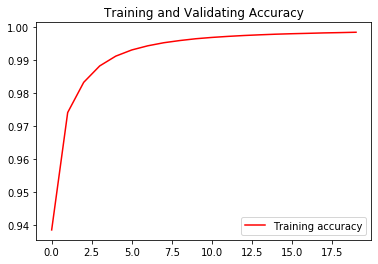

In [12]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
#val_acc = history.history['val_accuracy']
#val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
#plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [13]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_8_3_model.h5')